# Semi_project
## Covid19 - Tiredness

### 0.개요
1. 데이터 기간: 2020년 2월 ~ 2021년 7월
2. 주제: 사회적 거리두기 정책의 실효성에 대한 의문으로 시간의 흐름에 따른 거리두기 참여율 변화를 확인하고자 한다.
3. 선정이유
- 사회적 거리두기 정책은 꾸준히 시행되어 왔고, 그 단계가 점차 상향되고 있지만 실제 확진자 수는 늘어나고 있는 추세이다.
- 서울시 유동인구 데이터를 통해 시민들이 얼마나 사회적 거리두기 정책에 적극적으로 동참하고 있는지 파악한다 
- 코로나19 상황 지속에 의한 시민들의 피로도 누적이 사회적 거리두기 정책 참여에 어떤 영향을 미치고 있는지 파악하여 시민들의 피로감을 고려한 새로운 정책의 필요성을 강조하고자한다.

### 1.유동인구 데이터 설명

- 일별 지하철 이용 승객수를 유동인구라 하겠다.
(초기에 유동인구 데이터를 수집할 수 없어 지하철 이용 승객수로 유동인구를 파악하였으나 추후에 유동인구 데이터를 발견했고 
기존의 데이터와 유동인구 데이터를 분석하니 높은 유사도를 보였기에 기존 데이터를 사용하였습니다.)

##### csv 파일 불러오기
- 여러 파일을 불러 하나의 데이터 프레임으로 합치기

In [81]:
import pandas as pd 
from glob import glob # 파일 경로 조작가능
import chardet

# 파일 여러개 한 번에 불러오기
# 불러올 파일 리스트를 forder에 저장
# 해당 디렉토리 내에 .CSV 파일을 다 불러와서 리스트에 넣어준다
forder = glob('C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\*.csv')
# print(forder)
subwayData = [] 

# 인코딩 확인 코드(불러오고자하는 파일의 인코딩 설정이 다 다름)
for files in forder:
        rawdata = open(files, 'rb').read() #파일 열고
        test = chardet.detect(rawdata) # 인코딩 형식 검사하고
        result = test['encoding']  # 인코딩 결과 확인하고
        # print(result) 

for files in forder:
    df = pd.read_csv(files, encoding = result,index_col=False) #위에서 확인한 인코딩을 넣어서 append
    subwayData.append(df)
    
allData = pd.concat(subwayData ,ignore_index=True )
print(allData.tail())

            사용일자  노선명         역명  승차총승객수  하차총승객수      등록일자
325922  20210731  경원선         회룡    6891    6963  20210803
325923  20210731  4호선  회현(남대문시장)   12413   13193  20210803
325924  20210731  경의선      효창공원앞    1299    1454  20210803
325925  20210731  6호선      효창공원앞    3313    2828  20210803
325926  20210731  9호선  흑석(중앙대입구)    3689    3787  20210803


#### 서울시에 있는 역만 추출하기
- 서울시에 있는 역명이 담긴 리스트를 생성
- 서울시에 있는 역들의 데이터만 추출

In [82]:
subwaySt = pd.DataFrame()  # 데이터프레임생성
for files in forder:
    data = pd.read_csv(files, encoding='utf_8', index_col=False)  # 202002~04/09/까지 encoding 설정이 다름
    subwaySt = pd.concat([subwaySt, data])
seoul_station = ["가락시장", "가산디지털단지", "가양", "가오리", "가좌", "강남", "강남구청", "강동", "강동구청", "강변", "강일", "개롱", "개봉", "개포동", "개화",
                 "개화산", "거여", "건대입구", "경복궁", "경찰병원", "고덕", "고려대", "고속터미널", "공덕", "공릉", "공항시장", "광나루", "광운대", "광화문",
                 "광흥창", "교대", "구로", "구로디지털단지", "구룡", "구반포", "구산", "구의", "구일", "구파발", "국회의사당", "군자", "굽은다리", "금천구청",
                 "금호", "길동", "길음", "김포공항", "까치산", "낙성대", "남구로", "남부터미널", "남성", "남영", "남태령", "내방", "노들", "노량진", "노원",
                 "녹번", "녹사평", "녹천", "논현", "답십리", "당고개", "당산", "대림", "대모산입구", "대방", "대청", "대치", "대흥", "도곡", "도림천", "도봉",
                 "도봉산", "독립문", "독바위", "독산", "돌곶이", "동대문", "동대문역사문화공원", "동대입구", "동묘앞", "동작", "둔촌동", "둔촌오륜", "등촌",
                 "디지털미디어시티", "뚝섬", "뚝섬유원지", "마곡", "마곡나루", "마들", "마장", "마천", "마포", "마포구청", "망우", "망원", "매봉", "먹골", "면목",
                 "명동", "명일", "목동", "몽촌토성", "무악재", "문래", "문정", "미아", "미아사거리", "반포", "발산", "방배", "방이", "방학", "방화", "버티고개",
                 "보라매", "보문", "복정", "봉은사", "봉천", "봉화산", "북한산보국문", "북한산우이", "불광", "사가정", "사당", "사평", "삼각지", "삼성", "삼성중앙",
                 "삼양", "삼양사거리", "삼전", "상계", "상도", "상봉", "상수", "상왕십리", "상월곡", "상일동", "새절", "샛강", "서강대", "서대문", "서빙고",
                 "서울대입구", "서울숲", "서울역", "서초", "석계", "석촌", "석촌고분", "선릉", "선유도", "선정릉", "성수", "성신여대입구", "솔샘", "솔밭공원",
                 "송정", "송파", "송파나루", "수락산", "수색", "수서", "수유", "숙대입구", "숭실대입구", "시청", "신금호", "신길", "신내", "신논현", "신답",
                 "신당", "신대방", "신대방삼거리", "신도림", "신림", "신목동", "신반포", "신방화", "신사", "신설동", "신용산", "신이문", "신정", "신정네거리",
                 "신촌(2)", "신촌(경)", "신풍", "쌍문", "아차산", "아현", "안국", "안암", "암사", "압구정", "압구정로데오", "애오개", "약수", "양원", "양재",
                 "양재시민의숲", "양천구청", "양천향교", "양평(5)", "어린이대공원", "언주", "여의나루", "여의도", "역삼", "역촌", "연신내", "염창", "영등포",
                 "영등포구청", "영등포시장", "오금", "오류동", "오목교", "옥수", "온수", "올림픽공원", "왕십리", "외대앞", "용답", "용두", "용마산", "용산",
                 "우장산", "월계", "월곡", "월드컵경기장", "을지로입구", "을지로3가", "을지로4가", "응봉", "응암", "이대", "이수", "이촌", "이태원", "일원",
                 "잠실", "잠실나루", "잠실새내", "잠원", "장승배기", "장지", "장한평", "정릉", "제기동", "종각", "종로3가", "종로5가", "종합운동장", "중계",
                 "중곡", "중랑", "중앙보훈병원", "중화", "증미", "증산", "창동", "창신", "천왕", "천호", "청구", "청담", "청량리", "충무로", "충정로",
                 "태릉입구", "하계", "학동", "학여울", "한강진", "한남", "한성대입구", "한성백제", "한양대", "한티", "합정", "행당", "혜화", "홍대입구", "홍제",
                 "화계", "화곡", "화랑대", "회기", "회현", "효창공원앞", "흑석"]

# 엑셀의 전체 역들 중복제거
station = subwaySt["역명"].unique()
print(len(station), len(seoul_station))

cnt = 0
same_st = []
for j in seoul_station:  # 여기서 단어를 비교
    for i in station:  # () 가 추가로 붙어있음
        # print(j.find(i))
        if i.find(j) == 0 and i not in same_st:
            if i == j:
                same_st.append(i)
            elif i.find(j + "(") == 0:
                same_st.append(i)
            else:
                pass
        elif i == "신촌" and j == "신촌(2)":
            same_st.append(j)
        elif i == "신촌" and j == "신촌(경)":
            same_st.append(j)
        elif i == "양평" and j == "양평(5)":
            same_st.append(j)

#print(len(same_st))
st = []
for i in same_st:
    st.append(i)
#print(st)

# allData['역명'] 이 조건(st에 있는 역명과 같은)에 부합하는 역의 데이터만 추출
# true/false

is_seoul = allData['역명'].isin(st)
#print(is_seoul)

seoulSubway = allData[is_seoul] 
print(seoulSubway.head())

526 298
       사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자
0  20200201  1호선    시청   13966   14315  20200204
1  20200201  1호선    종각   24014   23628  20200204
2  20200201  1호선  종로3가   25613   24969  20200204
3  20200201  1호선  종로5가   19922   19765  20200204
4  20200201  1호선   동대문   11346   11210  20200204


#### 서울 내 지하철 역 자치구별로 구분
- 역명과 자치구가 있는 데이터 생성
- 기존 지하철 데이터와 자치구가 있는 파일을 하나로 합치기

In [83]:
file = 'C:\\Users\\82102\\PycharmProjects\\python_base\\data\\서울역.csv'
seoul = pd.read_csv(file, encoding='utf_8', index_col=False)
# print(seoul.info())
#print(seoul.head())

# 자치구 파일과 기존 seoulSubway 파일을 하나로 합치기(역명 기준)
seoulSubway = pd.merge(seoulSubway,seoul, on='역명', how='left')
print(seoulSubway.head())

       사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자   자치구
0  20200201  1호선    시청   13966   14315  20200204    중구
1  20200201  1호선    종각   24014   23628  20200204   종로구
2  20200201  1호선  종로3가   25613   24969  20200204   종로구
3  20200201  1호선  종로5가   19922   19765  20200204   종로구
4  20200201  1호선   동대문   11346   11210  20200204   종로구


#### 자치구별 & 일별 - 총승객수 시각화
- 자치구별 일자별로 그룹화해 승하차인원을 합한 승하차총승객수를 구한다

In [84]:
seoulSubway['승하차총승객수'] = seoulSubway['승차총승객수'] + seoulSubway['하차총승객수']

# 일자별, 자치구별 group 승하차총승객수 
# 그룹별 집계하는 방법 - 일자별 집계
subArea = seoulSubway.groupby([seoulSubway['자치구'],seoulSubway['사용일자']], as_index = False)['승하차총승객수'].sum()
# print(subArea.head())
# subArea.info() # 사용일자 타입이 int64

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subArea["사용일자"] = pd.to_datetime(subArea["사용일자"], format='%Y%m%d')
print(subArea.head())

    자치구       사용일자  승하차총승객수
0   강남구 2020-02-01   793428
1   강남구 2020-02-02   479389
2   강남구 2020-02-03  1382648
3   강남구 2020-02-04  1409308
4   강남구 2020-02-05  1390449


#### 일별 - 서울시 전체 총승객수  시각화
- 일자별로 그룹화해 승하차인원을 합한 승하차총승객수를 구한다

In [85]:
pd.set_option('mode.chained_assignment',  None) # 에러 경고문 무시

# 사용일자로 그룹화
seoulSubway['승하차총승객수'] = seoulSubway['승차총승객수'] + seoulSubway['하차총승객수']
# print(seoulSubway.head())

# 그룹별 집계하는 방법 - 일자별 집계
subDay = seoulSubway.groupby(['사용일자'], as_index = False)['승하차총승객수'].sum()
# print(subDay.head())
# subDay.info() # 사용일자 타입이 int64

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subDay["사용일자"] = pd.to_datetime(subDay["사용일자"], format='%Y%m%d')
print(subDay.head())

        사용일자   승하차총승객수
0 2020-02-01   7283952
1 2020-02-02   5134050
2 2020-02-03  10729908
3 2020-02-04  10869656
4 2020-02-05  10611929


- 서울시 전체 일별 - 유동인구 시각화 그래프 생성
- 기존의 지하철 승객수 데이터와 새로운 유동인구 데이터 간 유사성 파악

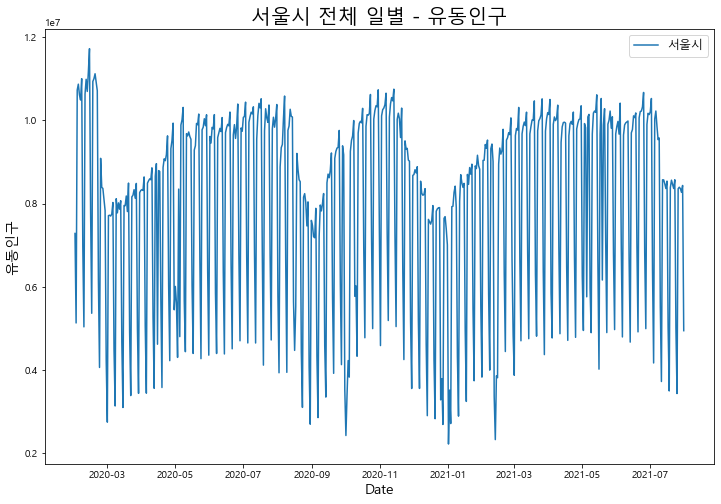

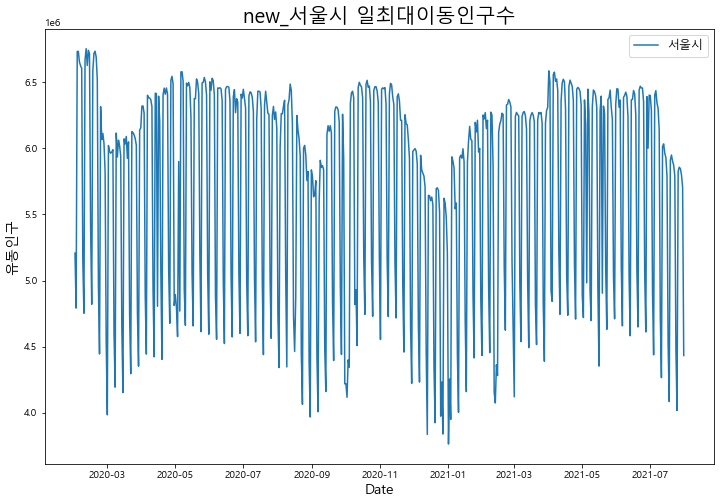

        사용일자   승하차총승객수
0 2020-02-01   7283952
1 2020-02-02   5134050
2 2020-02-03  10729908
3 2020-02-04  10869656
4 2020-02-05  10611929
     시군구명      기준일ID     일최대이동인구수
7658  서울시 2020-02-01  5206826.985
7659  서울시 2020-02-02  4791434.360
7660  서울시 2020-02-03  6732880.559
7661  서울시 2020-02-04  6732387.851
7662  서울시 2020-02-05  6651883.528


In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', family='Malgun Gothic')

ax = sns.lineplot(x='사용일자',
                  y='승하차총승객수',
                  data=subDay)



plt.title('서울시 전체 일별 - 유동인구', fontsize=20)
plt.ylabel('유동인구', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['서울시'],fontsize=12, loc='best')


plt.show()


# 새로운 서울시 전체 유동인구 데이터와 비교----------------------------------------------------------------------------------------
# 데이터 불러오기
file_path = 'C:\\Users\\82102\\Downloads\\자치구단위 서울생활인구 일별 집계표.csv'
popData = pd.read_csv(file_path, encoding = 'CP949', index_col=False)

popData = popData.groupby([popData['시군구명'],popData['기준일ID']], as_index = False)['일최대이동인구수'].sum()
popData["기준일ID"] = pd.to_datetime(popData["기준일ID"], format='%Y%m%d')

# 시각화
total = popData[popData['시군구명'] != '서울시'].index
total_df = popData.drop(total)

# 시각화
ax = sns.lineplot(x='기준일ID',
                  y='일최대이동인구수',
                  hue='시군구명',
                  data=total_df)



plt.title('new_서울시 일최대이동인구수', fontsize=20)
plt.ylabel('유동인구', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')


plt.show()


          사용일자   승하차총승객수     일최대이동인구수
0   2020-02-01   7283952  5206826.985
1   2020-02-02   5134050  4791434.360
2   2020-02-03  10729908  6732880.559
3   2020-02-04  10869656  6732387.851
4   2020-02-05  10611929  6651883.528
..         ...       ...          ...
542 2021-07-27   8394807  5856613.148
543 2021-07-28   8361133  5845626.626
544 2021-07-29   8270860  5797935.754
545 2021-07-30   8436558  5706219.414
546 2021-07-31   4948883  4432581.392

[547 rows x 3 columns]


Text(0.5, 1.0, '지하철이용승객수 - 서울시이동인구 그래프 유사성')

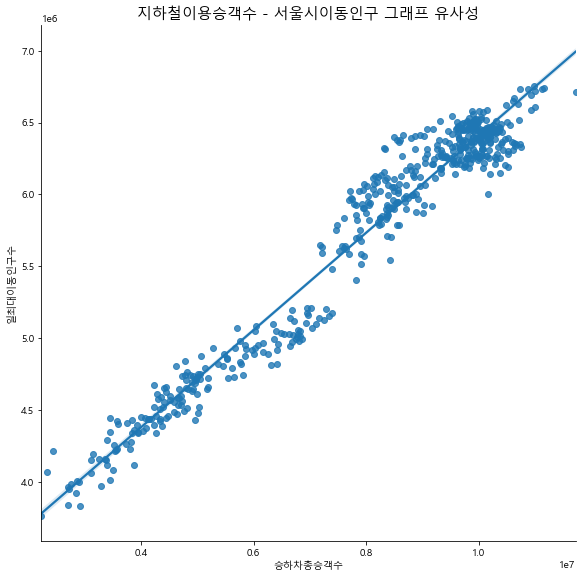

In [195]:
#print(total_df)

total_df['사용일자'] = total_df['기준일ID']
total_graph = total_df.iloc[:,[2,3]]
# print(total_graph) # 필요한 컬럼만 추출해 merge

Subway_graph = pd.merge(subDay,total_graph, on='사용일자', how='left')
print(Subway_graph)

# 상관관계
sns.lmplot(x='승하차총승객수', y='일최대이동인구수',
          data=Subway_graph, height=8)
plt.title("지하철이용승객수 - 서울시이동인구 그래프 유사성", size = 15)

- 각 역을 자치구 별로 나누고 자치구별 유동인구 그래프 생성
- 새로운 유동인구 데이터와의 유사도 파악

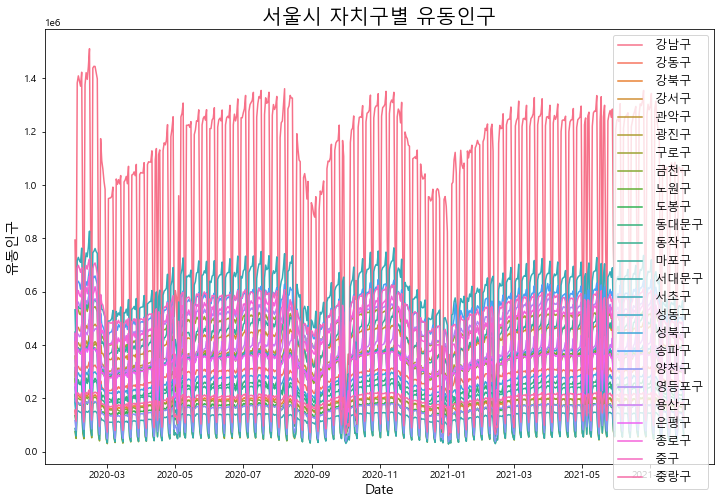

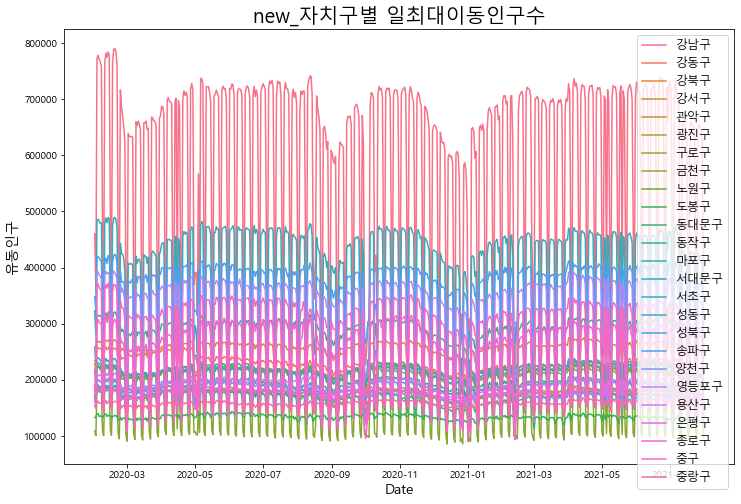

In [87]:
ax = sns.lineplot(x='사용일자', 
                  y='승하차총승객수', 
                  hue='자치구',
                  data=subArea)


plt.title('서울시 자치구별 유동인구', fontsize=20)
plt.ylabel('유동인구', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

# --------------------------------------------------------------------------
notot = popData[popData['시군구명'] == '서울시'].index
notot_df = popData.drop(notot)

# 시각화
ax = sns.lineplot(x='기준일ID',
                  y='일최대이동인구수',
                  hue='시군구명',
                  data=notot_df)


plt.title('new_자치구별 일최대이동인구수', fontsize=20)
plt.ylabel('유동인구', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [89]:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools

fig = px.bar(subArea, x='사용일자', y='승하차총승객수', 
             color = "자치구", color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title='<b>서울시 자치구별 유동인구</b>', 
                  plot_bgcolor="#FFFFFF",yaxis_gridcolor = '#D5D5D5')


fig.show()

In [91]:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools

fig = px.bar(subArea, x='사용일자', y='승하차총승객수', 
              color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title='<b>서울시 전체 유동인구</b>', 
                  plot_bgcolor="#FFFFFF",yaxis_gridcolor = '#D5D5D5')

fig.show()

In [196]:
# https://chancoding.tistory.com/96
import os
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime as dt

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

layout_font = {'font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

georidoogi_start = ['2020-02-29' , '2020-03-22' , '2020-04-20' , '2020-05-06' , '2020-06-28' , '2020-08-28' , '2020-11-07' , '2020-12-24' , '2021-07-01' , '2021-07-12']
georidoogi_end = ['2020-03-21' , '2020-04-27' , '2020-05-05' , '2020-06-27' , '2020-08-27' , '2020-11-06' , '2021-06-30' , '2021-03-14' , '2021-07-11' , '2021-08-08']
georidoogi_start =  pd.to_datetime(georidoogi_start, format='%Y%m%d')
georidoogi_end = pd.to_datetime(georidoogi_end, format='%Y%m%d')



ValueError: time data '2020-02-29' does not match format '%Y%m%d' (match)

### 자치구별 코로나 데이터 사용하기
1. 파일 불러오기
2. 결측값('자치구 기준일'이 '20'으로 되어있는 데이터) 제거
3. '자치구 기준일' 기준으로 역순 정렬
4. '자치구 기준일' date 타입으로 변환
5. 신규확진자수(추가)만 추출해 데이터프레임 생성
6. 서울 전체 신규확진자수(sum)구해서 일별로 '서울신규확진자수'컬럼 생성
7. 누적확진자수(전체)만 추출해 데이터프레임 생성
8. 서울 전체 누적확진자수(sum)구해서 일별로 '서울누적확진자수'컬럼 생성


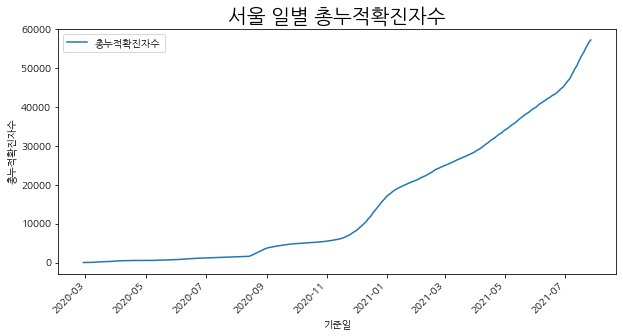

In [148]:
def cumulative_corona() :
    import pandas as pd
    
    # csv 파일 불러오기 ----------------------------------------------
    file_path = 'C:\\Users\\82102\\PycharmProjects\\python_base\\corona_data\\서울특별시 코로나19 자치구별 확진자 발생동향.csv'
    df = pd.read_csv(file_path, encoding = 'CP949', index_col = False)
    
   # 결측값 제거 -----------------------------------------------------
    na_index = df[df['자치구 기준일'] == '20'].index #자치구 기준일이 20인 데이터의 인덱스를 추출
   # print(na_index)
    covData = df.drop(na_index)
   # print(covData.info())

    # '자치구 기준일' data 타입으로 변환 ------------------------------
    covData["자치구 기준일"] = covData["자치구 기준일"].str.slice(start=0 , stop=10)
    covData["자치구 기준일"] = pd.to_datetime(covData["자치구 기준일"] , format = '%Y.%m.%d')
    
    # 오래된 날짜 순서로 정렬 -----------------------------------------
    covData = covData.sort_values(by = ['자치구 기준일'])
    
    # 자치구별 누적확진자수만 추출해 데이터프레임생성 -----------------
    cumulative = covData.filter(regex='기준일|전체')
    # print(cumulative.head())
    
    pd.set_option('mode.chained_assignment',  None) # ↓자꾸 에러떠서 경고문 끔
    # 서울시 전체 누적확진자수 컬럼 추가
    # print(cumulative.info())
    cumulative['총누적확진자수'] = cumulative.iloc[:,1:26].sum(axis=1)
    # print(cumulative.tail())
    
    # 자치구별 신규확진자수 추출해 데이터프레임생성 -------------------
    new = covData.filter(regex='기준일|추가')
    new['총신규확진자수'] = new.iloc[:,1:26].sum(axis=1)
   # print(new.head())

    #시각화 -----------------------------------------------------------
    import matplotlib.pyplot as plt       
    from matplotlib import rcParams
    rcParams['axes.unicode_minus'] = False
    plt.rc('font', family='NanumGothic')
    
    # 1. 서울 전체 누적확진자수 그래프 ---------------------------------
    # 인덱스 설정
    # 기준일 컬럼을 인덱스로 지정
    cumulative.set_index('자치구 기준일', inplace=True)
    
    # 그래프 생성
    cumulative.plot(y='총누적확진자수', figsize=(10, 5))
    plt.ylabel('총누적확진자수', fontsize=10)
    plt.xlabel('기준일', fontsize=10)
    plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
    plt.title('서울 일별 총누적확진자수',fontsize=20) ## 타이틀 설정
    
    plt.show()
    

cumulative_corona()

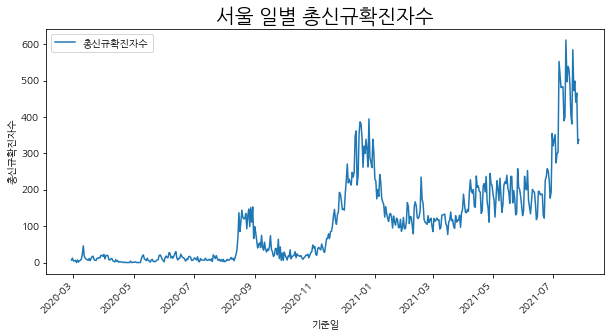

In [149]:
import pandas as pd
    
# csv 파일 불러오기 ----------------------------------------------
file_path = 'C:\\Users\\82102\\PycharmProjects\\python_base\\corona_data\\서울특별시 코로나19 자치구별 확진자 발생동향.csv'
df = pd.read_csv(file_path, encoding = 'CP949', index_col = False)
    
# 결측값 제거 -----------------------------------------------------
na_index = df[df['자치구 기준일'] == '20'].index #자치구 기준일이 20인 데이터의 인덱스를 추출
# print(na_index)
covData = df.drop(na_index)
# print(covData.info())

# '자치구 기준일' data 타입으로 변환 ------------------------------
covData["자치구 기준일"] = covData["자치구 기준일"].str.slice(start=0 , stop=10)
covData["자치구 기준일"] = pd.to_datetime(covData["자치구 기준일"] , format = '%Y.%m.%d')
    
# 오래된 날짜 순서로 정렬 -----------------------------------------
covData = covData.sort_values(by = ['자치구 기준일'])
    
   
pd.set_option('mode.chained_assignment',  None) # ↓자꾸 에러떠서 경고문 끔
  
# 자치구별 신규확진자수 추출해 데이터프레임생성 -------------------
new = covData.filter(regex='기준일|추가')
new['총신규확진자수'] = new.iloc[:,1:26].sum(axis=1)
# print(new.head())

#시각화 -----------------------------------------------------------
import matplotlib.pyplot as plt       
from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')
    
# 1. 서울 전체 누적확진자수 그래프 ---------------------------------
# 인덱스 설정
# 기준일 컬럼을 인덱스로 지정
new.set_index('자치구 기준일', inplace=True)
    
# 그래프 생성
new.plot(y='총신규확진자수', figsize=(10, 5))
plt.ylabel('총신규확진자수', fontsize=10)
plt.xlabel('기준일', fontsize=10)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('서울 일별 총신규확진자수',fontsize=20) ## 타이틀 설정

plt.show()
    

In [152]:
# 서울시 전체 신규 확진자 (선그래프) 
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools

fig = px.line(new,
              y= '총신규확진자수',
             title = '<b>일단위 신규 확진자 수</b>')
fig.show()

In [153]:
# 자치구별 확진자 수

# 필요없는 컬럼 삭제
new_df = new.drop(['총신규확진자수','기타 추가'], axis='columns')


fig = px.line(new_df,
             title = '<b>자치구별 신규 확진자 수</b>')
fig.show()

In [101]:
print(subArea.info())
print()
print(subDay.head())
print()
print(new.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13675 entries, 0 to 13674
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   자치구      13675 non-null  object        
 1   사용일자     13675 non-null  datetime64[ns]
 2   승하차총승객수  13675 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 427.3+ KB
None

        사용일자   승하차총승객수
0 2020-02-01   7283952
1 2020-02-02   5134050
2 2020-02-03  10729908
3 2020-02-04  10869656
4 2020-02-05  10611929

            종로구 추가  중구 추가  용산구 추가  성동구 추가  광진구 추가  동대문구 추가  중랑구 추가  성북구 추가  \
자치구 기준일                                                                      
2020-02-28     0.0    0.0     0.0     0.0     1.0      1.0     0.0     0.0   
2020-02-29     0.0    0.0     0.0     1.0     0.0      0.0     0.0     0.0   
2020-03-01     0.0    0.0     0.0     0.0     0.0      0.0     0.0     0.0   
2020-03-02     0.0    0.0     0.0     0.0     1.0      0.0   